In [2]:
%matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from config import key

csv = pd.read_csv('stations.csv')

Using matplotlib backend: Qt5Agg


In [15]:
version = 'v1'
package = ['history','stations']

city = 'Toronto'
country = 'Canada'

start_date_daily = '2000-01-01'
end_date_daily = '2010-01-01'

start_date_month = '1950-01'
end_date_month = '2018-12'

#station is for Sydney
station_id = '94767'

#url structure = https://api.meteostat.net/{VERSION}/{PACKAGE}/{METHOD}?{PARAMETERS}
#https://api.meteostat.net/v1/history/hourly?station=03772&start=2019-05-02&end=2019-05-11&time_zone=Europe/London&time_format=Y-m-d%20H:i&key=XXXXXXXX
#https://api.meteostat.net/v1/history/daily?station=10637&start=2017-01-01&end=2017-12-31&key=XXXXXXXX

historyparams_daily ={
    'start':start_date_daily,
    'end':end_date_daily,
    'key':key
    }

historyparams_monthly ={
    'start':start_date_month,
    'end':end_date_month,
    'key':key
    }

#method includes: daily, monthly
qry_daily_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
qry_monthly_url = f'https://api.meteostat.net/v1/history/monthly?station={station_id}'

#get request for history

history_monthly = requests.get(qry_monthly_url,params=historyparams_monthly).json()

#for x 
#history_daily = requests.get(qry_daily_url,params=historyparams_daily).json()
#history_daily

history_monthly

{'meta': {'source': 'National Oceanic and Atmospheric Administration, Deutscher Wetterdienst'},
 'data': [{'month': '1974-01',
   'temperature_mean': 22.9,
   'temperature_mean_min': None,
   'temperature_mean_max': None,
   'temperature_min': None,
   'temperature_max': None,
   'precipitation': 151,
   'raindays': 17,
   'pressure': 1015.7,
   'sunshine': None},
  {'month': '1974-02',
   'temperature_mean': 21.6,
   'temperature_mean_min': None,
   'temperature_mean_max': None,
   'temperature_min': None,
   'temperature_max': None,
   'precipitation': 107,
   'raindays': 8,
   'pressure': 1015.2,
   'sunshine': None},
  {'month': '1974-03',
   'temperature_mean': 21.8,
   'temperature_mean_min': None,
   'temperature_mean_max': None,
   'temperature_min': None,
   'temperature_max': None,
   'precipitation': 298,
   'raindays': 12,
   'pressure': 1017.9,
   'sunshine': None},
  {'month': '1974-04',
   'temperature_mean': 18,
   'temperature_mean_min': None,
   'temperature_mean_max'

In [16]:
#THIS IS FOR MONTHLY
# date_monthly = history_monthly['data'][0]['month']
# temp_mean_monthly = history_monthly['data'][0]['temperature_mean']
# temp_mean_min_monthly = history_monthly['data'][0]['temperature_mean_min']
# temp_mean_max_monthly = history_monthly['data'][0]['temperature_mean_max']
# temp_min_monthly = history_monthly['data'][0]['temperature_min']
# temp_max_monthly = history_monthly['data'][0]['temperature_max']
# precipitation_monthly = history_monthly['data'][0]['precipitation']
# raindays_monthly = history_monthly['data'][0]['raindays']
# pressure_monthly = history_monthly['data'][0]['pressure']
# sunshine_monthly = history_monthly['data'][0]['sunshine']

# THIS IS FOR DAILY
#date_daily = history_daily['data'][0]['date']
#temp_daily = history_daily['data'][0]['temperature']
#temp_min_daily = history_daily['data'][0]['temperature_min']
#temp_max_daily = history_daily['data'][0]['temperature_max']
#precip_daily = history_daily['data'][0]['precipitation']
#snowfall_daily = history_daily['data'][0]['snowfall']
#snowdepth_daily = history_daily['data'][0]['snowdepth']
#wind_dir_daily = history_daily['data'][0]['winddirection']
#wind_speed_daily = history_daily['data'][0]['windspeed']
#peakgust_daily = history_daily['data'][0]['peakgust']
#sunshine_daily = history_daily['data'][0]['sunshine']
#pressure_daily = history_daily['data'][0]['pressure']

In [17]:
date_ls = []
temp_mean_ls = []
# temp_mean_min_ls = []
# temp_mean_max_ls = []
# temp_min_ls = []
# temp_max_ls = []
# precipitation_ls = []
# raindays_ls = []
# pressure_ls = []
# sunshine_ls = []

for x in range(len(history_monthly["data"])):
    date_ls.append(history_monthly['data'][x]['month'])
    temp_mean_ls.append(history_monthly['data'][x]['temperature_mean'])
#     temp_mean_min_ls.append(history_monthly['data'][x]['temperature_mean_max'])
#     temp_mean_max_ls.append(history_monthly['data'][x]['temperature_mean_min'])
#     temp_min_ls.append(history_monthly['data'][x]['temperature_min'])
#     temp_max_ls.append(history_monthly['data'][x]['temperature_max'])
#     precipitation_ls.append(history_monthly['data'][x]['precipitation'])
#     raindays_ls.append(history_monthly['data'][x]['raindays'])
#     pressure_ls.append(history_monthly['data'][x]['pressure'])
#     sunshine_ls.append(history_monthly['data'][x]['sunshine'])
    
print(f"{len(date_ls)},{len(temp_mean_ls)},{len(temp_mean_ls)},{len(temp_mean_min_ls)},{len(temp_mean_max_ls)},{len(temp_min_ls)},{len(temp_max_ls)},{len(precipitation_ls)},{len(raindays_ls)},{len(pressure_ls)},{len(sunshine_ls)}")

360,360,360,360,360,360,360,360,360,360,360


In [18]:
df = pd.DataFrame(date_ls)
df['tempMean'] = temp_mean_ls
# df['tempMeanMin'] = temp_mean_min_ls
# df['tempMeanMax'] =temp_mean_max_ls
# df['tempMin'] =temp_min_ls
# df['tempMax'] = temp_max_ls
# df['precip'] = precipitation_ls
# df['rainDays'] = raindays_ls
# df['pressure'] = pressure_ls
# df['sunshine'] = sunshine_ls
    
df.head()

,0,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
0,1974-01,22.9,NaN,NaN,NaN,NaN,151,17,1015.7,NaN
1,1974-02,21.6,NaN,NaN,NaN,NaN,107,8,1015.2,NaN
2,1974-03,21.8,NaN,NaN,NaN,NaN,298,12,1017.9,NaN
3,1974-04,18.0,NaN,NaN,NaN,NaN,133,13,1016.7,NaN
4,1974-05,15.9,NaN,NaN,NaN,NaN,186,10,1019.2,NaN


In [19]:
df.describe()

,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine
count,360.000000,108.000000,108.000000,60.000000,60.000000,360.000000,360.000000,348.000000,312.000000
mean,18.003889,22.438889,14.300926,10.260000,30.190000,91.133333,7.950000,1016.763218,217.224359
std,3.807482,3.420139,4.052748,4.284825,5.526537,85.121863,3.797485,3.594556,37.800045
min,11.000000,16.200000,6.800000,3.600000,20.000000,0.000000,0.000000,1006.800000,111.000000
25%,14.400000,19.400000,11.000000,6.000000,25.375000,32.000000,5.000000,1014.300000,193.000000
50%,18.300000,22.900000,14.100000,10.000000,30.200000,63.000000,8.000000,1016.400000,216.000000
75%,21.425000,25.200000,18.000000,14.100000,34.550000,126.000000,10.000000,1019.425000,244.000000
max,25.000000,29.600000,20.900000,18.000000,41.100000,581.000000,18.000000,1027.300000,306.000000


In [20]:
# GOOD CODE ENDS HERE

In [46]:
#rename first column to date
df = df.rename(columns={0:'date'})

In [47]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMin,diffMax
0,1974-01-01,22.9,NaN,NaN,NaN,NaN,151,17,1015.7,NaN,NaN,NaN
1,1974-02-01,21.6,NaN,NaN,NaN,NaN,107,8,1015.2,NaN,NaN,NaN
2,1974-03-01,21.8,NaN,NaN,NaN,NaN,298,12,1017.9,NaN,NaN,NaN
3,1974-04-01,18.0,NaN,NaN,NaN,NaN,133,13,1016.7,NaN,NaN,NaN
4,1974-05-01,15.9,NaN,NaN,NaN,NaN,186,10,1019.2,NaN,NaN,NaN
5,1974-06-01,12.8,NaN,NaN,NaN,NaN,202,12,1018.2,NaN,NaN,NaN
6,1974-07-01,12.1,NaN,NaN,NaN,NaN,12,3,1014.7,NaN,NaN,NaN
7,1974-08-01,12.3,NaN,NaN,NaN,NaN,176,7,1014.3,NaN,NaN,NaN
8,1974-09-01,14.2,NaN,NaN,NaN,NaN,37,6,1016.7,NaN,NaN,NaN
9,1974-10-01,16.7,NaN,NaN,NaN,NaN,59,15,1014.1,NaN,NaN,NaN


In [48]:
x_axis = df['date']

In [51]:
y_axis_avgTemp = df['tempMean']
y_axis_avgTempMin = df['tempMeanMin']
y_axis_avgTempMax = df['tempMeanMax']
y_axis_tempMin = df['tempMin']
y_axis_tempMax = df['tempMax']

#find the difference between tempMean, tempMin, tempMax

In [52]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMin,diffMax
0,1974-01-01,22.9,NaN,NaN,NaN,NaN,151,17,1015.7,NaN,NaN,NaN
1,1974-02-01,21.6,NaN,NaN,NaN,NaN,107,8,1015.2,NaN,NaN,NaN
2,1974-03-01,21.8,NaN,NaN,NaN,NaN,298,12,1017.9,NaN,NaN,NaN
3,1974-04-01,18.0,NaN,NaN,NaN,NaN,133,13,1016.7,NaN,NaN,NaN
4,1974-05-01,15.9,NaN,NaN,NaN,NaN,186,10,1019.2,NaN,NaN,NaN


In [40]:
df['diffMin'] = df['tempMean'] - df['tempMin' ]

In [53]:
df['diffMax'] = df['tempMean'] - df['tempMax']

In [42]:
df

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMin,diffMax
0,1974-01-01,22.9,NaN,NaN,NaN,NaN,151,17,1015.7,NaN,NaN,NaN
1,1974-02-01,21.6,NaN,NaN,NaN,NaN,107,8,1015.2,NaN,NaN,NaN
2,1974-03-01,21.8,NaN,NaN,NaN,NaN,298,12,1017.9,NaN,NaN,NaN
3,1974-04-01,18.0,NaN,NaN,NaN,NaN,133,13,1016.7,NaN,NaN,NaN
4,1974-05-01,15.9,NaN,NaN,NaN,NaN,186,10,1019.2,NaN,NaN,NaN
5,1974-06-01,12.8,NaN,NaN,NaN,NaN,202,12,1018.2,NaN,NaN,NaN
6,1974-07-01,12.1,NaN,NaN,NaN,NaN,12,3,1014.7,NaN,NaN,NaN
7,1974-08-01,12.3,NaN,NaN,NaN,NaN,176,7,1014.3,NaN,NaN,NaN
8,1974-09-01,14.2,NaN,NaN,NaN,NaN,37,6,1016.7,NaN,NaN,NaN
9,1974-10-01,16.7,NaN,NaN,NaN,NaN,59,15,1014.1,NaN,NaN,NaN


In [43]:
df.head()

,date,tempMean,tempMeanMin,tempMeanMax,tempMin,tempMax,precip,rainDays,pressure,sunshine,diffMin,diffMax
0,1974-01-01,22.9,NaN,NaN,NaN,NaN,151,17,1015.7,NaN,NaN,NaN
1,1974-02-01,21.6,NaN,NaN,NaN,NaN,107,8,1015.2,NaN,NaN,NaN
2,1974-03-01,21.8,NaN,NaN,NaN,NaN,298,12,1017.9,NaN,NaN,NaN
3,1974-04-01,18.0,NaN,NaN,NaN,NaN,133,13,1016.7,NaN,NaN,NaN
4,1974-05-01,15.9,NaN,NaN,NaN,NaN,186,10,1019.2,NaN,NaN,NaN


In [44]:
#y_axis_diff = df['diffMinMax']
#y_axis_diffMin = df['diffMin']
#y_axis_diffMax = df['diffMax']

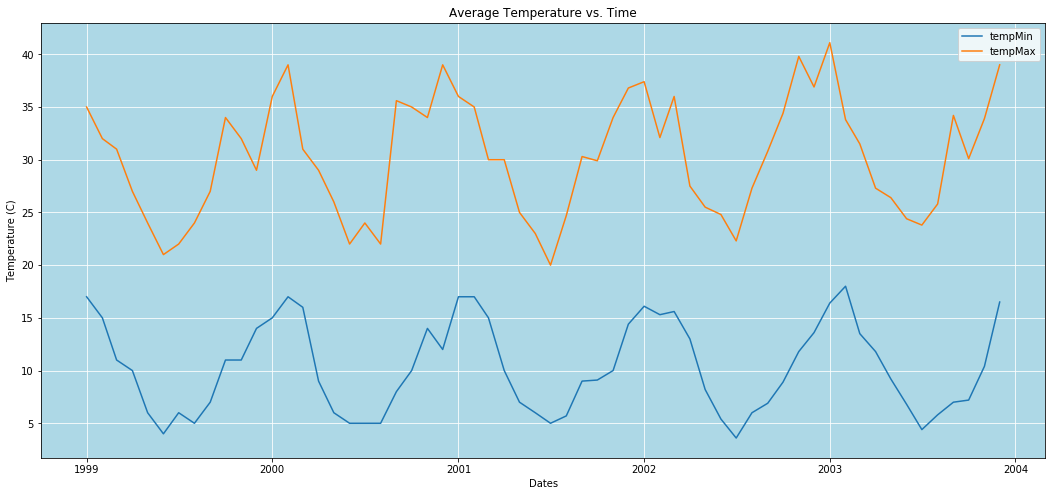

In [45]:
#x_ticks =['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

fig, ax = plt.subplots()


#ax.plot(x_axis,y_axis_avgTemp,c='red',ls='--',marker='^')
#ax.plot(x_axis,y_axis_avgTempMin,c='green')
#ax.plot(x_axis,y_axis_avgTempMax,c='purple')
ax.plot(x_axis,y_axis_tempMin)
ax.plot(x_axis,y_axis_tempMax)
#ax.plot(x_axis,y_axis_diffMin)
#ax.plot(x_axis,y_axis_diffMax)
#ax.plot(x_axis,y_axis_diff)
#ax.plot(x_axis,)
#ax.scatter(x_axis,y_axis,c='red',s=200)
#ax.set_xticks()
#ax.set_xlim('2005','2020')
fig.set_figheight(8)
fig.set_figwidth(18)
ax.set_title('Average Temperature vs. Time')
ax.set_xlabel('Dates')
ax.set_ylabel('Temperature (C)')
ax.set_facecolor('lightblue')
ax.grid(color='white')
ax.legend()
#plt.hlines(y_axis_avgTemp)
#plt.axhline(0,0,1)


#plt.savefig(os.path.join(f'Test.png'))
plt.show()

In [ ]:
#ROUGH CODE FOLLOWS

In [ ]:
cityparams ={
    'q':city,
    'key':key
    }

qry_url_city = 'https://api.meteostat.net/v1/stations/search?'

countryparams={
    'country':country,
    'key':key   
    }
#response_country = requests.get(qry_url_country).json()
qry_url_country = 'https://api.meteostat.net/v1/stations/search?q=CA'

#response_country = requests.get(qry_url_country).json()
test_url = f'https://api.meteostat.net/v1/stations/search?q={city}&key={key}'

In [ ]:


#for index, row in staging_df.iterrows():
#    stationid = row['station_id']
#    stationidparams={
#    'start':start_date,
#    'end':end_date,
#    'key':key
#    }
#    print(f'Processing Record {index} set of | {stationid}')
#    response = requests.get(qry_history_url,params=stationidparams).json()
    
    #try:
    #    staging_df['meta_source'] = history['meta']['source']
    #except:KeyError
    #    print('missing values, i am going to skip it')
    #    print('====================================')


In [ ]:
csv.head()

In [ ]:
# #station id
# station_df = csv['stationid']

# #reset index for dataframe
# station_df = station_df.reset_index()

# station_df.head()

In [ ]:
#stationid = row['stationid']

#station

stationidparams={
    'start':start_date,
    'end':end_date,
    'key':key
    }
    #print(f'Processing Record {index} set of | {stationid}')
response = requests.get(qry_history_url,params=stationidparams).json()

In [ ]:
stationid = station_df['stationid']

In [ ]:
station_df['stationid']

In [ ]:
#city_df.loc[index,'Cloudiness']=response['clouds']['all']

for index, row in staging_df.iterrows():
    try:
        station_id = row['stationid']
        print(station_id)
    except:
        print('Type error, i am going to skip it')
        print('==================================')
    #qry_url = f'https://api.meteostat.net/v1/history/daily?station={station_id}'
    #stationidparams={
    #'start':start_date,
    #'end':end_date,
    #'key':key
    #}
    #print(f'Processing Record {index} set of | {station_id}')
    #response = requests.get(qry_url,params=stationidparams).json()
    #staging_df.loc[index,'meta_source'] = response['meta']['source']
    #except:KeyError
    #try:
        
        #print('missing values, i am going to skip it')
        #print('====================================')

In [ ]:
station_id